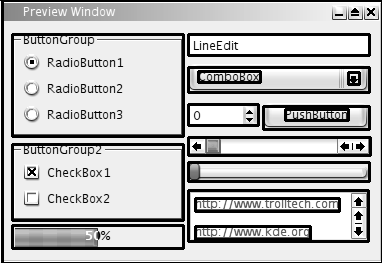

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Carregar imagem diretamente em escala de cinza
image = cv.imread("gui_example.png", cv.IMREAD_GRAYSCALE)

# Pré-processamento para melhorar detecção de bordas
blurred = cv.GaussianBlur(image, (5, 5), 0)

# Canny Edge Detection com parâmetros ajustados
edges = cv.Canny(blurred, 70, 200)

# Operação morfológica para unir bordas próximas
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
closed = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)

# Encontrar contornos
contours, _ = cv.findContours(closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filtrar contornos por área mínima (ajustar conforme necessidade)
min_area = 10
filtered_contours = [cnt for cnt in contours if cv.contourArea(cnt) > min_area]

# Desenhar retângulos apenas nos contornos relevantes
output = image.copy()
for cnt in filtered_contours:
    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar resultado
cv2_imshow(output)

#ds = load_dataset("rootsautomation/ScreenSpot")

#example = ds['test'][0]
#print(example)